<a href="https://colab.research.google.com/github/CristianoDataScience/Projeto-Logistica/blob/main/analise_gestao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Gestão de Logística**
___
![](https://media.licdn.com/dms/image/D4D12AQF7fTs0aTltXQ/article-cover_image-shrink_600_2000/0/1689423185822?e=2147483647&v=beta&t=6x4UKxMnti6uVrpUTq6J3UEqiRD_cmZLA6IfADYe-TU)

## Bibliotecas

In [69]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando base de dados

In [4]:
df_log = pd.read_excel('/content/drive/MyDrive/Projeto_Logistica/dataset_logistica.xlsx')
df_log.head()

,Nº Pedido,Cliente-Motorista,Data Emissão Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Saída para Entrega,Data Entrega Real,Qtd Devolução,Mot. Devolução,Dias Para Entrega,Status
0,A3,WALMART-FELIPE SILVA,2019-01-27,2019-02-06,SP,3,139.5,2019-01-29,2019-02-03,0,S/ Devolu.,7,No Prazo
1,A4,MAGAZINE LUIZA-TÚLIO SILVEIRA,2019-01-28,2019-02-07,RJ,4,134.4,2019-02-09,2019-02-12,0,S/ Devolu.,15,Atrasado
2,A7,MAGAZINE LUIZA-VALDIR ESPINOSA,2019-02-04,2019-02-14,SP,5,79.5,2019-02-07,2019-02-14,1,Produto Errado,10,No Prazo
3,A12,MAGAZINE LUIZA-MARCOS LEROY,2019-02-18,2019-02-28,SP,20,326.0,2019-02-23,2019-02-25,11,Produto Errado,7,No Prazo
4,A15,WALMART-LUIZ PARDAL,2019-02-21,2019-03-03,RJ,12,597.6,2019-02-28,2019-03-07,0,S/ Devolu.,14,Atrasado


In [5]:
# Verificando quantidades de linhas e colunas
df_log.shape

(4282, 13)

In [6]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Nº Pedido              4282 non-null   object        
 1   Cliente-Motorista      4282 non-null   object        
 2   Data Emissão Pedido    4282 non-null   datetime64[ns]
 3   Data Entrega Prevista  4282 non-null   datetime64[ns]
 4   Destino                4282 non-null   object        
 5   Itens                  4282 non-null   int64         
 6   R$ Faturados           4282 non-null   float64       
 7   Saída para Entrega     4282 non-null   datetime64[ns]
 8   Data Entrega Real      4282 non-null   datetime64[ns]
 9    Qtd Devolução         4282 non-null   int64         
 10  Mot. Devolução         4282 non-null   object        
 11  Dias Para Entrega      4282 non-null   int64         
 12  Status                 4282 non-null   object        
dtypes: 

## Porcentagem de Pedidos Entregues no Prazo

In [8]:
# Contagem de pedidos por status
status_contagem = df_log['Status'].value_counts()
status_contagem

,count
Status,
Atrasado,3135
No Prazo,1147


In [10]:
# Porcentagem de pedidos entregues no prazo e atrasados
porcentagem_no_prazo = (status_contagem.get('No Prazo', 0) / len(df_log)) * 100
porcentagem_atrasado = (status_contagem.get('Atrasado', 0) / len(df_log)) * 100

print(f'Porcentagem de pedidos entregues no prazo: {porcentagem_no_prazo:.2f}%')
print(f'Porcentagem de pedidos atrasados: {porcentagem_atrasado:.2f}%')

Porcentagem de pedidos entregues no prazo: 26.79%
Porcentagem de pedidos atrasados: 73.21%


## Tempo Médio de Atraso para os Pedidos Atrasados

In [11]:
# Filtrando pedido atrasados
pedidos_atrasados = df_log[df_log['Status'] == 'Atrasado']
pedidos_atrasados

,Nº Pedido,Cliente-Motorista,Data Emissão Pedido,Data Entrega Prevista,Destino,Itens,R$ Faturados,Saída para Entrega,Data Entrega Real,Qtd Devolução,Mot. Devolução,Dias Para Entrega,Status
1,A4,MAGAZINE LUIZA-TÚLIO SILVEIRA,2019-01-28,2019-02-07,RJ,4,134.4,2019-02-09,2019-02-12,0,S/ Devolu.,15,Atrasado
4,A15,WALMART-LUIZ PARDAL,2019-02-21,2019-03-03,RJ,12,597.6,2019-02-28,2019-03-07,0,S/ Devolu.,14,Atrasado
5,A16,WALMART-JOÃO GOMES,2019-02-23,2019-03-05,RJ,14,467.6,2019-02-28,2019-03-06,9,Produto Errado,11,Atrasado
6,A17,WALMART-JOÃO GOMES,2019-02-24,2019-03-06,SP,6,297.0,2019-02-27,2019-03-09,1,Produto Errado,13,Atrasado
8,A22,AMERICANAS-VALDIR ESPINOSA,2019-03-01,2019-03-11,SP,10,165.0,2019-03-06,2019-03-13,1,Danificado,12,Atrasado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,A9675,MAGAZINE LUIZA-VALDIR ESPINOSA,2021-11-27,2021-12-07,RJ,16,763.2,2021-12-12,2021-12-15,1,Produto Errado,18,Atrasado
4278,A9676,WALMART-LUIZ PARDAL,2021-11-28,2021-12-08,SP,14,226.8,2021-12-10,2021-12-12,1,Produto Errado,14,Atrasado
4279,A9680,CASA E VIDEO-TÚLIO SILVEIRA,2021-12-02,2021-12-12,SP,17,821.1,2021-12-19,2021-12-20,2,Danificado,18,Atrasado
4280,A9681,RICARDO ELETRO-MARCOS LEROY,2021-12-03,2021-12-13,SP,1,49.8,2021-12-08,2021-12-17,0,S/ Devolu.,14,Atrasado


In [13]:
# Calculando tempo médio de atraso
tempo_medio_atraso = pedidos_atrasados['Dias Para Entrega'].mean()
print(f'Tempo médio de atraso para os pedidos atrasados: {tempo_medio_atraso:.2f} dias')

Tempo médio de atraso para os pedidos atrasados: 14.91 dias


## Analisar a Taxa de Devolução por Cliente e por Destino

In [17]:
# Somar as devoluções por cliente
devolucoes_por_cliente = df_log.groupby('Cliente-Motorista')[' Qtd Devolução'].sum()
devolucoes_por_cliente

,Qtd Devolução
Cliente-Motorista,
AMERICANAS-FELIPE SILVA,116
AMERICANAS-JOÃO GOMES,173
AMERICANAS-LUIZ PARDAL,144
AMERICANAS-MARCOS LEROY,357
AMERICANAS-TÚLIO SILVEIRA,132
AMERICANAS-VALDIR ESPINOSA,137
CASA E VIDEO-FELIPE SILVA,57
CASA E VIDEO-JOÃO GOMES,144
CASA E VIDEO-LUIZ PARDAL,82


In [19]:
# Somar o total de itens por cliente
total_itens_por_cliente = df_log.groupby('Cliente-Motorista')['Itens'].sum()
total_itens_por_cliente

,Itens
Cliente-Motorista,
AMERICANAS-FELIPE SILVA,1044
AMERICANAS-JOÃO GOMES,788
AMERICANAS-LUIZ PARDAL,1063
AMERICANAS-MARCOS LEROY,1044
AMERICANAS-TÚLIO SILVEIRA,994
AMERICANAS-VALDIR ESPINOSA,1043
CASA E VIDEO-FELIPE SILVA,539
CASA E VIDEO-JOÃO GOMES,559
CASA E VIDEO-LUIZ PARDAL,854


In [29]:
# Taxa de devolução por cliente
devolucoes_por_cliente = df_log.groupby('Cliente-Motorista')[' Qtd Devolução'].sum()
total_itens_por_cliente = df_log.groupby('Cliente-Motorista')['Itens'].sum()
taxa_devolucao_por_cliente = (devolucoes_por_cliente / total_itens_por_cliente) * 100

# Taxa de devolução em percentual
print("Taxa de devolução por cliente:")
for cliente, taxa in taxa_devolucao_por_cliente.items():
    print(f"{cliente}: {taxa:.2f}%")

Taxa de devolução por cliente:
AMERICANAS-FELIPE SILVA: 11.11%
AMERICANAS-JOÃO GOMES: 21.95%
AMERICANAS-LUIZ PARDAL: 13.55%
AMERICANAS-MARCOS LEROY: 34.20%
AMERICANAS-TÚLIO SILVEIRA: 13.28%
AMERICANAS-VALDIR ESPINOSA: 13.14%
CASA E VIDEO-FELIPE SILVA: 10.58%
CASA E VIDEO-JOÃO GOMES: 25.76%
CASA E VIDEO-LUIZ PARDAL: 9.60%
CASA E VIDEO-MARCOS LEROY: 36.09%
CASA E VIDEO-TÚLIO SILVEIRA: 8.93%
CASA E VIDEO-VALDIR ESPINOSA: 12.69%
CASAS BAHIA-FELIPE SILVA: 10.70%
CASAS BAHIA-JOÃO GOMES: 26.47%
CASAS BAHIA-LUIZ PARDAL: 12.13%
CASAS BAHIA-MARCOS LEROY: 31.73%
CASAS BAHIA-TÚLIO SILVEIRA: 10.21%
CASAS BAHIA-VALDIR ESPINOSA: 10.09%
MAGAZINE LUIZA-FELIPE SILVA: 10.24%
MAGAZINE LUIZA-JOÃO GOMES: 31.17%
MAGAZINE LUIZA-LUIZ PARDAL: 10.81%
MAGAZINE LUIZA-MARCOS LEROY: 30.10%
MAGAZINE LUIZA-TÚLIO SILVEIRA: 10.07%
MAGAZINE LUIZA-VALDIR ESPINOSA: 11.90%
RICARDO ELETRO-FELIPE SILVA: 13.46%
RICARDO ELETRO-JOÃO GOMES: 28.18%
RICARDO ELETRO-LUIZ PARDAL: 14.29%
RICARDO ELETRO-MARCOS LEROY: 28.57%
RICARDO ELET

## Identificar os Principais Motivos de Devolução

In [31]:
# Contagem de cada motivo de devolução
motivos_devolucao = df_log['Mot. Devolução'].value_counts()
motivos_devolucao

,count
Mot. Devolução,
Produto Errado,1562
Danificado,1339
S/ Devolu.,1060
Arrependimento,321


## Clientes e Destinos com Maior Incidência de Devoluções

In [41]:
# Filtrar apenas os pedidos com devolução
pedidos_com_devolucao = df_log[df_log[' Qtd Devolução'] > 0]

# Clientes com maior incidência de devoluções
clientes_com_mais_devolucoes = pedidos_com_devolucao['Cliente-Motorista'].value_counts()

# Destinos com maior incidência de devoluções
destinos_maior_incidencia = pedidos_com_devolucao.groupby('Destino')[' Qtd Devolução'].sum().sort_values(ascending=False)


In [43]:
print("\nDestinos com maior incidência de devoluções:")
print(destinos_maior_incidencia)


Destinos com maior incidência de devoluções:
Destino
BH    2757
SP    2626
RJ    2589
Name:  Qtd Devolução, dtype: int64


## Calcular o Valor Total Faturado por Cliente e por Destino

In [46]:
# Calcular o valor total faturado por cliente
faturamento_por_cliente = df_log.groupby('Cliente-Motorista')['R$ Faturados'].sum()

print("Faturamento total por cliente:")
print(faturamento_por_cliente)

Faturamento total por cliente:
Cliente-Motorista
AMERICANAS-FELIPE SILVA           31916.5
AMERICANAS-JOÃO GOMES             25360.3
AMERICANAS-LUIZ PARDAL            33333.4
AMERICANAS-MARCOS LEROY           35369.9
AMERICANAS-TÚLIO SILVEIRA         33753.1
AMERICANAS-VALDIR ESPINOSA        29170.4
CASA E VIDEO-FELIPE SILVA         17354.5
CASA E VIDEO-JOÃO GOMES           19207.0
CASA E VIDEO-LUIZ PARDAL          24168.6
CASA E VIDEO-MARCOS LEROY         25034.4
CASA E VIDEO-TÚLIO SILVEIRA       25661.1
CASA E VIDEO-VALDIR ESPINOSA      19682.6
CASAS BAHIA-FELIPE SILVA          58480.6
CASAS BAHIA-JOÃO GOMES            54860.2
CASAS BAHIA-LUIZ PARDAL           59626.6
CASAS BAHIA-MARCOS LEROY          69675.4
CASAS BAHIA-TÚLIO SILVEIRA        54256.2
CASAS BAHIA-VALDIR ESPINOSA       51290.8
MAGAZINE LUIZA-FELIPE SILVA       42805.4
MAGAZINE LUIZA-JOÃO GOMES         52889.1
MAGAZINE LUIZA-LUIZ PARDAL        48500.4
MAGAZINE LUIZA-MARCOS LEROY       48055.2
MAGAZINE LUIZA-TÚLIO SILVEI

## Faturamento Total por Destino

In [47]:
# Calcular o valor total faturado por destino
faturamento_por_destino = df_log.groupby('Destino')['R$ Faturados'].sum()

print("\nFaturamento total por destino:")
print(faturamento_por_destino)


Faturamento total por destino:
Destino
BH    501186.6
RJ    479113.0
SP    471462.1
Name: R$ Faturados, dtype: float64


## Verificar a Distribuição do Valor Faturado ao Longo do Tempo

In [48]:
# Converter a coluna 'Data Emissão Pedido' para datetime
df_log['Data Emissão Pedido'] = pd.to_datetime(df_log['Data Emissão Pedido'])

In [50]:
# Faturamento mensal
faturamento_mensal = df_log.groupby(df_log['Data Emissão Pedido'].dt.to_period('M'))['R$ Faturados'].sum()

print("\nFaturamento ao longo do tempo (mensal):")
print(faturamento_mensal)


Faturamento ao longo do tempo (mensal):
Data Emissão Pedido
2019-01       273.9
2019-02      2240.9
2019-03      5289.4
2019-04      3686.1
2019-05      5051.2
2019-06      8617.7
2019-07      9623.8
2019-08     12546.8
2019-09     12719.6
2019-10     13887.2
2019-11     15770.4
2019-12     17763.4
2020-01     17562.8
2020-02     19286.7
2020-03     20836.7
2020-04     21452.7
2020-05     20068.4
2020-06     74294.8
2020-07    134276.7
2020-08    161880.5
2020-09    152579.7
2020-10    135910.9
2020-11    145873.9
2020-12     98907.7
2021-01     43010.0
2021-02     39434.5
2021-03     45985.7
2021-04     41692.0
2021-05     37908.6
2021-06     32036.1
2021-07     30227.5
2021-08     25659.7
2021-09     18018.4
2021-10     16117.8
2021-11      9683.1
2021-12      1586.4
Freq: M, Name: R$ Faturados, dtype: float64


# Visualização da Distribuição do Faturamento

In [63]:
# Convertendo a coluna 'Data Emissão Pedido' para datetime
df_log['Data Emissão Pedido'] = pd.to_datetime(df_log['Data Emissão Pedido'])

faturamento_mensal = df_log.groupby(df_log['Data Emissão Pedido'].dt.to_period('M'))['R$ Faturados'].sum()

faturamento_mensal = faturamento_mensal.reset_index()
faturamento_mensal['Data Emissão Pedido'] = faturamento_mensal['Data Emissão Pedido'].dt.to_timestamp()

fig = px.line(faturamento_mensal, x='Data Emissão Pedido', y='R$ Faturados',
              title='Faturamento Mensal', markers=True, template='plotly_dark')

fig.update_layout(xaxis_title='Data Emissão Pedido', yaxis_title='R$ Faturados')

# Adicionando anotações aos picos do gráfico
annotation_template = go.layout.Template()
annotation_template.layout.annotationdefaults = dict(font=dict(color="crimson"))

# Identificando picos (exemplo simples: valores máximos)
picos = faturamento_mensal[faturamento_mensal['R$ Faturados'] == faturamento_mensal['R$ Faturados'].max()]

annotations = [
    dict(text=f"Faturamento Máximo: {row['R$ Faturados']}",
         x=row['Data Emissão Pedido'], y=row['R$ Faturados'],
         showarrow=True, arrowhead=1, ax=0, ay=-40,
         arrowcolor="white", font=dict(color="white"))
    for _, row in picos.iterrows()
]

fig.update_layout(template='plotly_dark', annotations=annotations)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Análise de Eficiência da Entrega

In [65]:
df_log['Saída para Entrega'] = pd.to_datetime(df_log['Saída para Entrega'])
df_log['Data Entrega Real'] = pd.to_datetime(df_log['Data Entrega Real'])

In [68]:
# Calculando o tempo de entrega real em dias
df_log['Tempo Entrega Real (dias)'] = (df_log['Data Entrega Real'] - df_log['Saída para Entrega']).dt.days

# Exibindo o DataFrame com a nova coluna
print(df_log[['Nº Pedido', 'Saída para Entrega', 'Data Entrega Real', 'Tempo Entrega Real (dias)']])

     Nº Pedido Saída para Entrega Data Entrega Real  Tempo Entrega Real (dias)
0           A3         2019-01-29        2019-02-03                          5
1           A4         2019-02-09        2019-02-12                          3
2           A7         2019-02-07        2019-02-14                          7
3          A12         2019-02-23        2019-02-25                          2
4          A15         2019-02-28        2019-03-07                          7
...        ...                ...               ...                        ...
4277     A9675         2021-12-12        2021-12-15                          3
4278     A9676         2021-12-10        2021-12-12                          2
4279     A9680         2021-12-19        2021-12-20                          1
4280     A9681         2021-12-08        2021-12-17                          9
4281     A9683         2021-12-08        2021-12-17                          9

[4282 rows x 4 columns]


# correlação entre número de itens/valor faturado e tempo de entrega

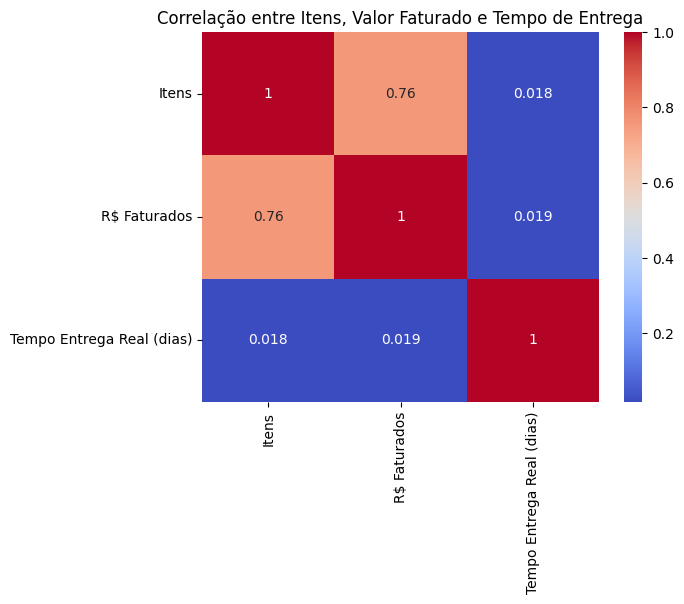

In [71]:
# Correlação entre Tempo de Entrega e Número de Itens/Valor Faturado
correlacao = df_log[['Itens', 'R$ Faturados', 'Tempo Entrega Real (dias)']].corr()

# Plotando a matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Correlação entre Itens, Valor Faturado e Tempo de Entrega')
plt.show()

# Análise de Correlação

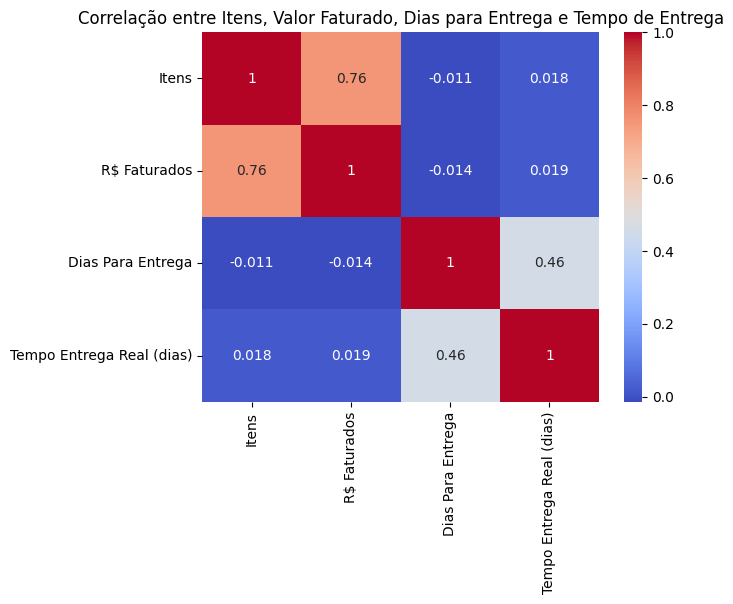

In [72]:
# Incluindo a coluna 'Dias Para Entrega'
correlacao_completa = df_log[['Itens', 'R$ Faturados', 'Dias Para Entrega', 'Tempo Entrega Real (dias)']].corr()

# Plotando a matriz de correlação completa
sns.heatmap(correlacao_completa, annot=True, cmap='coolwarm')
plt.title('Correlação entre Itens, Valor Faturado, Dias para Entrega e Tempo de Entrega')
plt.show()

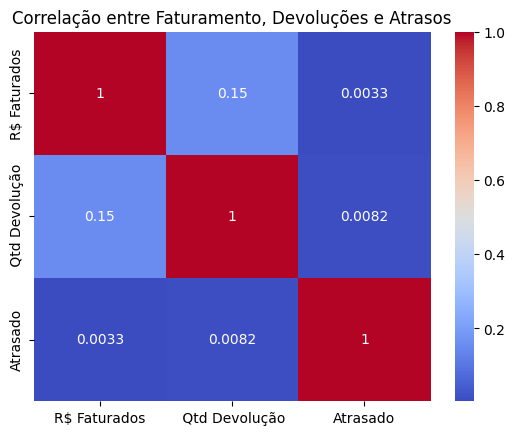

Correlação por Cliente:
                                        R$ Faturados   Qtd Devolução  Atrasado
Cliente-Motorista                                                             
AMERICANAS-FELIPE SILVA R$ Faturados        1.000000        0.050416  0.006671
                         Qtd Devolução      0.050416        1.000000  0.005685
                        Atrasado            0.006671        0.005685  1.000000
AMERICANAS-JOÃO GOMES   R$ Faturados        1.000000       -0.168588  0.154213
                         Qtd Devolução     -0.168588        1.000000 -0.039237
...                                              ...             ...       ...
WALMART-TÚLIO SILVEIRA   Qtd Devolução      0.084686        1.000000  0.023522
                        Atrasado            0.058616        0.023522  1.000000
WALMART-VALDIR ESPINOSA R$ Faturados        1.000000        0.086953  0.013181
                         Qtd Devolução      0.086953        1.000000 -0.053232
                        Atra

In [78]:
# Convertendo a coluna 'Status' em numérico (Atrasado = 1, No Prazo = 0)
df_log['Atrasado'] = df_log['Status'].apply(lambda x: 1 if x == 'Atrasado' else 0)

# Incluindo a coluna 'Qtd Devolução'
correlacao_devolucao = df_log[['R$ Faturados', ' Qtd Devolução', 'Atrasado']].corr()

# Plotando a matriz de correlação para devoluções e atrasos
sns.heatmap(correlacao_devolucao, annot=True, cmap='coolwarm')
plt.title('Correlação entre Faturamento, Devoluções e Atrasos')
plt.show()

# Correlação por cliente ou destino
correlacao_por_cliente = df_log.groupby('Cliente-Motorista')[['R$ Faturados', ' Qtd Devolução', 'Atrasado']].corr()
correlacao_por_destino = df_log.groupby('Destino')[['R$ Faturados', ' Qtd Devolução', 'Atrasado']].corr()

print("Correlação por Cliente:")
print(correlacao_por_cliente)

print("Correlação por Destino:")
print(correlacao_por_destino)